<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <a href="http://bokeh.pydata.org/">     
           <img 
               src="assets/bokeh-transparent.png" 
               style="width:50px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>A3. High-Level Charting with Holoviews</h2></div>

Bokeh is designed to make it possible to construct rich, deeply interactive browser-based visualizations from Python source code.  It has a syntax more compact and natural than older libraries like Matplotlib, particularly when using the Charts API, but it still requires a good bit of code to do relatively common data-science tasks like complex multi-figure layouts, animations, and widgets for parameter space exploration.

To make it feasible to generate complex interactive visualizations "on the fly" in Jupyter notebooks while exploring data, we have created the new [HoloViews](http://holoviews.org) library built on top of Bokeh.  

HoloViews allows you to annotate your data with a small amount of metadata that makes it instantly visualizable, usually without writing any plotting code.  HoloViews makes it practical to explore datasets and visualize them from every angle interactively, wrapping up Bokeh code for common tasks into a set of configurable and composable components.  HoloViews installs separately from Bokeh, e.g. using `conda install holoviews`, and also works with matplotlib.


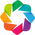

In [1]:
import holoviews as hv
import numpy as np
hv.notebook_extension('bokeh')

# A simple function

First, let us define a mathematical function to explore, using the Numpy array library:

In [2]:
def sine(x, phase=0, freq=100):
    return np.sin((freq * x + phase))

We will examine the effect of varying phase and frequency:

In [3]:
phases = np.linspace(0,2*np.pi,7)  # Explored phases
freqs = np.linspace(50,150,5)      # Explored frequencies

Over a specific spatial area, sampled on a grid:

In [4]:
dist = np.linspace(-0.5,0.5,81)   # Linear spatial sampling
x,y = np.meshgrid(dist, dist)
grid = (x**2+y**2)                 # 2D spatial sampling

# Succinct data visualization

With HoloViews, we can immediately view our simple function as an image in a Bokeh plot in the Jupyter notebook, without any coding:

In [5]:
hv.__version__

1.8.3

In [6]:
hv.Image(sine(grid, freq=20))

:Image   [x,y]   (z)

But we can just as easily use ``+`` to combine ``Image`` and ``Curve`` objects, visualizing both the 2D array (with associated histogram) and a 1D cross-section:

In [7]:
grating = hv.Image(sine(grid, freq=20), label="Sine Grating")

((grating * hv.HLine(y=0)).hist() + grating.sample(y=0).relabel("Sine Wave"))

:Layout
   .AdjointLayout.Sine_Grating :AdjointLayout
      :Overlay
         .Image.Sine_Grating :Image   [x,y]   (z)
         .HLine.I            :HLine   [x,y]
      :Histogram   [z]   (Frequency)
   .Curve.Sine_Wave            :Curve   [x]   (z)

Here you can see that a HoloViews object isn't really a plot (though it generates a Bokeh Plot when requested for display by the Jupyter notebook); it is just a wrapper around your data, and the data can be processed directly (as when taking the cross-section using `sample()` here).  In fact, your raw data is *always* still available,allowing you to go back and forth between visualizations and numerical analysis easily and flexibly:

In [8]:
grating[0,0]

0.0

In [9]:
type(grating.data)

numpy.ndarray

Here the underlying data is the original Numpy array, but Python dictionaries as well as Pandas and other data formats can also be supplied.

 The underlying objects and data can always be retrieved, even in complex multi-figure objects, if you look at the `repr` of the object to find the indexes needed to address that data:

In [10]:
layout = ((grating * hv.HLine(y=0)) + grating.sample(y=0))
print(repr(layout))
layout.Overlay.Sine_Grating.Image.Sine_Grating[0,0]

:Layout
   .Overlay.Sine_Grating :Overlay
      .Image.Sine_Grating :Image   [x,y]   (z)
      .HLine.I            :HLine   [x,y]
   .Curve.Sine_Grating   :Curve   [x]   (z)


0.0

Here `layout` is the name of the full complex object, and `Overlay.Sine_Grating` selects the first item (an HLine overlaid on a grating), and `Image.Sine_Grating` selects the grating within the overlay.  The grating itself is then indexed by 'x' and 'y' as shown in the repr, and the return value from such indexing is 'z' (nearly zero in this case, which you can also see by examining the curve plot above).

# Interactive exploration

HoloViews is designed to explore complicated datasets, where there can often be much more data than can be shown on screen at once.  If there are dimensions to your data that have not been laid out as adjacent plots or overlaid plots, then HoloViews will automatically generate sliders covering the remaining range of the data.  For instance, if we add an additional dimension `Y` indicating the location of the cross-section, we'll get a slider for `Y`:

In [11]:
positions = np.linspace(-0.3, 0.3, 17)

hv.HoloMap({y: (grating * hv.HLine(y)) for y in positions}, kdims='Y') + \
hv.HoloMap({y: (grating.sample(y=y))   for y in positions}, kdims='Y')

:Layout
   .HoloMap.Sine_Grating.I  :HoloMap   [Y]
      :Overlay
         .Image.Sine_Grating :Image   [x,y]   (z)
         .HLine.I            :HLine   [x,y]
   .HoloMap.Sine_Grating.II :HoloMap   [Y]
      :Curve   [x]   (z)

By default the data will be embedded fully into the output, allowing export to static HTML/JavaScript for distribution, but for parameter spaces too large or using dynamic data, a dynamic callback can be used with a callback that generates the data on the fly using a [DynamicMap](http://holoviews.org/Tutorials/Dynamic_Map.html).


# Setting display options

HoloViews objects like `grating` above directly contain only your data and associated metadata, not any plotting details.  Metadata like titles and units can be set on the objects either when created or subsequently, as shown using `label` and `relabel` above.  

Other properties of the visualization that are just about the view of it, not the actual data, are not stored on the HoloViews objects, but in a separate data structure.  To make it easy to control such options in the notebook, a special syntax is provided:

In [12]:
%%opts Image (cmap='RdYlGn') Curve (color='b' line_dash="dotted") HLine (line_color='white' line_width=9)
((grating * hv.HLine(y=0)).hist() + grating.sample(y=0))

:Layout
   .AdjointLayout.Sine_Grating :AdjointLayout
      :Overlay
         .Image.Sine_Grating :Image   [x,y]   (z)
         .HLine.I            :HLine   [x,y]
      :Histogram   [z]   (Frequency)
   .Curve.Sine_Grating         :Curve   [x]   (z)

One advantage of this special "magic" syntax is that the names and values tab complete in the Jupyter notebook (try it!). Here the regular parentheses '(' indicate options that are backend-specific; these are generally passed directly to Bokeh.  Options processed by HoloViews itself are specified using square brackets '['.  The `%%opts` command above applies only to the object in that cell, while the `%opts` form below will apply throughout the rest of the document.

In [13]:
%opts Points (size=3)

### EXERCISE: Try changing various parameters in the above plot, using tab completion to discover the names and values

Of course, you can express any option setting using standard Python syntax instead.  However, for technical reasons that syntax is much less succinct, and more importantly it mixes up display options with the actual data objects:

In [14]:
grating(options={'Image':{'style':{'cmap':'RdGy'}}})

:Image   [x,y]   (z)

Using the `%opts`/`%%opts` syntax above is both less verbose and helps keep the styling information separated from the much more important data and metadata, so that you can ignore styling when working directly with your data.


## Normalizing your data

HoloViews is designed to make it easy to understand your data. For instance, consider two circular waves with very different amplitudes: 

In [15]:
comparison = hv.Image(sine(grid)) + hv.Image(sine(grid, phase=np.pi)*0.02)

HoloViews ensures that these differences are visible by default, by normalizing across any elements of the same type that are displayed together, and even across the frames of an animation:

In [16]:
%%opts Image (cmap='gray')
comparison = hv.Image(sine(grid)) + hv.Image(sine(grid, phase=np.pi)*0.02)
comparison

:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)

This default visualization makes it clear that the two patterns differ greatly in amplitude. However, it is difficult to see the structure of the low-amplitude wave in **B**.  If you wish to focus on the spatial structure rather than the amplitude, you can instruct HoloViews to normalize data in different axes separately:

In [17]:
%%opts Image {+axiswise} (cmap='gray')
comparison

:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)

Similarly, you could supply ``+framewise`` to tell it to normalize data per frame of an animation, not across all frames as it does by default.  As with any other customization, you can always specify which specific element you want the customization to apply to, even in a complex multiple-subfigure layout.

# External data sources

To show how HoloViews differs from the standard Bokeh API, let's revisit the `iris` example from tutorial 1.

In [18]:
from bokeh.sampledata.iris import flowers
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Plotting this data using the usual Bokeh Charts API can quickly give a visualization, e.g. by typing:

```
show(Scatter(flowers, x='petal_length', y='petal_width'))
```

However, the results are limited to a few standard configurations, and you have to use the full Bokeh API for more complex visualizations.  With HoloViews, it's just as simple as in the Charts API to make a simple plot:

In [19]:
hv.Points(flowers, kdims=['petal_length','petal_width'], vdims=[])

:Points   [petal_length,petal_width]

Or a somewhat more complicated plot:

In [20]:
%opts NdOverlay [legend_position='top_left']
irises = hv.Dataset(flowers).to(hv.Points, kdims=['petal_length','petal_width'], groupby=['species'])

irises.overlay()

:NdOverlay   [species]
   :Points   [petal_length,petal_width]

But now you can very easily generate widgets, animations, and layouts. E.g. if you don't use `.overlay()` to tell HoloViews what to do with the species, it will become a widget automatically, without having to redefine anything that made up this plot:

In [21]:
irises.overlay() + irises

:Layout
   .NdOverlay.I :NdOverlay   [species]
      :Points   [petal_length,petal_width]
   .HoloMap.I   :HoloMap   [species]
      :Points   [petal_length,petal_width]

Here the previous plot has been added on the left to demonstrate that laying out data is just as simple as always in HoloViews.  You can instead tell HoloViews to lay out the species data side by side, just as easily:

In [22]:
irises.layout()

:NdLayout   [species]
   :Points   [petal_length,petal_width]

As you can see, HoloViews starts out with similar power to the Charts API, but then allows higher-level operations starting at this basic level.  Conversely, the Charts API will directly give you a Bokeh plot that you can work with using Bokeh's low-level functions, which you can use to make more precise (though verbose) customizations than are supported in HoloViews.

# Learning more

If you are interested in using HoloViews in your workflow, check out the extensive tutorials at [holoviews.org](http://holoviews.org), and at [geo.holoviews.org](http://geo.holoviews.org/) for geographic applications.  These tutorials cover everything shown above in much more detail, along with how to  
[export the data for a reproducible workflow](http://holoviews.org/Tutorials/Exporting.html), use 
[columnar data](http://holoviews.org/Tutorials/Columnar_Data.html) like Pandas Dataframes, use any of the other [plotting types available](http://holoviews.org/Tutorials/Elements.html), and use any of the other
[container types available](http://holoviews.org/Tutorials/Composing_Data.html).